## SOM composite FFDI values

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy as cart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from pathlib import Path
import scipy

%matplotlib inline

In [2]:
#Load daily FFDI data (from Andrew Dowdy BoM)
ds = xr.open_mfdataset('/g/data/v45/du2523/FFDI_daily_AndrewDowdy/FFDI/1950-2016/*.nc',
                       combine = 'nested',concat_dim='time')
ds


<xarray.Dataset>
Dimensions:  (time: 24472, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2016-12-31
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(365, 691, 886), meta=np.ndarray>
Attributes:
    FFDI:     Based_on_gridded_analysis_of_observations_(AWAP)_Jan2022_andrew...

In [3]:
#subset FFDI dataset to SOM period & NDJF 
ds = ds.sel(time = slice('1979-01-01','2018-10-31')) #dataset only goes to 2016 - check in morning
ds

<xarray.Dataset>
Dimensions:  (time: 13880, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2016-12-31
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(365, 691, 886), meta=np.ndarray>
Attributes:
    FFDI:     Based_on_gridded_analysis_of_observations_(AWAP)_Jan2022_andrew...

In [4]:
SOM_file = '/g/data/v45/du2523/SOM_daily_z500_anomaly_3_3.txt'
print(SOM_file)

# load txt file
SOM_date_winning_nodes = np.loadtxt(SOM_file)
SOM_winning_nodes = SOM_date_winning_nodes[0:13880,1]  #0 indexed - column 2 = column 1 #1979-2016
df_SOM_nodes = pd.DataFrame(SOM_winning_nodes,columns = ['SOM_node'])
df_SOM_nodes

/g/data/v45/du2523/SOM_daily_z500_anomaly_3_3.txt


,SOM_node
0,3.0
1,9.0
2,9.0
3,9.0
4,9.0
...,...
13875,4.0
13876,4.0
13877,4.0
13878,2.0


In [5]:
#create a date column for SOMs
SOM_date = pd.date_range(start = '01/01/1979', end = '31/12/2016', freq = 'D')
SOM_date = pd.DataFrame(SOM_date, columns = ['Date'])
SOM_date

/jobfs/71623383.gadi-pbs/ipykernel_867367/2706658927.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  SOM_date = pd.date_range(start = '01/01/1979', end = '31/12/2016', freq = 'D')


,Date
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
13875,2016-12-27
13876,2016-12-28
13877,2016-12-29
13878,2016-12-30


In [6]:
df_SOM = SOM_date.join(df_SOM_nodes)
df_SOM

,Date,SOM_node
0,1979-01-01,3.0
1,1979-01-02,9.0
2,1979-01-03,9.0
3,1979-01-04,9.0
4,1979-01-05,9.0
...,...,...
13875,2016-12-27,4.0
13876,2016-12-28,4.0
13877,2016-12-29,4.0
13878,2016-12-30,2.0


In [7]:
# Set date as Index
df_SOM.set_index('Date')

,SOM_node
Date,
1979-01-01,3.0
1979-01-02,9.0
1979-01-03,9.0
1979-01-04,9.0
1979-01-05,9.0
...,...
2016-12-27,4.0
2016-12-28,4.0
2016-12-29,4.0


In [8]:
#add month
df_SOM['month'] = df_SOM['Date'].dt.month
df_SOM

,Date,SOM_node,month
0,1979-01-01,3.0,1
1,1979-01-02,9.0,1
2,1979-01-03,9.0,1
3,1979-01-04,9.0,1
4,1979-01-05,9.0,1
...,...,...,...
13875,2016-12-27,4.0,12
13876,2016-12-28,4.0,12
13877,2016-12-29,4.0,12
13878,2016-12-30,2.0,12


In [9]:
#subset NDJF
df_SOM_NDJF = df_SOM[(df_SOM['month'] > 10) | (df_SOM['month'] < 3)]
df_SOM_NDJF

,Date,SOM_node,month
0,1979-01-01,3.0,1
1,1979-01-02,9.0,1
2,1979-01-03,9.0,1
3,1979-01-04,9.0,1
4,1979-01-05,9.0,1
...,...,...,...
13875,2016-12-27,4.0,12
13876,2016-12-28,4.0,12
13877,2016-12-29,4.0,12
13878,2016-12-30,2.0,12


In [ ]:
#save dataframe


In [10]:
ds_NDJF = ds.isel(time=ds.time.dt.month.isin([1, 2, 11,12]))
ds_NDJF

<xarray.Dataset>
Dimensions:  (time: 4570, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2016-12-31
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(120, 691, 886), meta=np.ndarray>
Attributes:
    FFDI:     Based_on_gridded_analysis_of_observations_(AWAP)_Jan2022_andrew...

In [11]:
#NDJF climatology
FFDI_clim = ds_NDJF.FFDI.mean(dim = 'time')
FFDI_clim

<xarray.DataArray 'FFDI' (lat: 691, lon: 886)>
dask.array<mean_agg-aggregate, shape=(691, 886), dtype=float32, chunksize=(691, 886), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2

In [12]:
#subset to SOM nodes
df_SOM1 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 1.0)]
df_SOM2 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 2.0)]
df_SOM3 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 3.0)]
df_SOM4 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 4.0)]
df_SOM5 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 5.0)]
df_SOM6 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 6.0)]
df_SOM7 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 7.0)]
df_SOM8 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 8.0)]
df_SOM9 = df_SOM_NDJF[(df_SOM_NDJF['SOM_node'] == 9.0)]

In [13]:
#create time index
SOM1_time = df_SOM1['Date'].values
SOM2_time = df_SOM2['Date'].values
SOM3_time = df_SOM3['Date'].values
SOM4_time = df_SOM4['Date'].values
SOM5_time = df_SOM5['Date'].values
SOM6_time = df_SOM6['Date'].values
SOM7_time = df_SOM7['Date'].values
SOM8_time = df_SOM8['Date'].values
SOM9_time = df_SOM9['Date'].values

In [14]:
#subset xarray 
SOM1 = ds_NDJF.sel(time = SOM1_time)
SOM2 = ds_NDJF.sel(time = SOM2_time)
SOM3 = ds_NDJF.sel(time = SOM3_time)
SOM4 = ds_NDJF.sel(time = SOM4_time)
SOM5 = ds_NDJF.sel(time = SOM5_time)
SOM6 = ds_NDJF.sel(time = SOM6_time)
SOM7 = ds_NDJF.sel(time = SOM7_time)
SOM8 = ds_NDJF.sel(time = SOM8_time)
SOM9 = ds_NDJF.sel(time = SOM9_time)

In [15]:
#composite conditions
cSOM1 = SOM1.FFDI.mean(dim = 'time')
cSOM2 = SOM2.FFDI.mean(dim = 'time')
cSOM3 = SOM3.FFDI.mean(dim = 'time')
cSOM4 = SOM4.FFDI.mean(dim = 'time')
cSOM5 = SOM5.FFDI.mean(dim = 'time')
cSOM6 = SOM6.FFDI.mean(dim = 'time')
cSOM7 = SOM7.FFDI.mean(dim = 'time')
cSOM8 = SOM8.FFDI.mean(dim = 'time')
cSOM9 = SOM9.FFDI.mean(dim = 'time')

In [16]:
#SOM anomaly
aSOM1 = cSOM1 - FFDI_clim
aSOM2 = cSOM2 - FFDI_clim
aSOM3 = cSOM3 - FFDI_clim
aSOM4 = cSOM4 - FFDI_clim
aSOM5 = cSOM5 - FFDI_clim
aSOM6 = cSOM6 - FFDI_clim
aSOM7 = cSOM7 - FFDI_clim
aSOM8 = cSOM8 - FFDI_clim
aSOM9 = cSOM9 - FFDI_clim

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


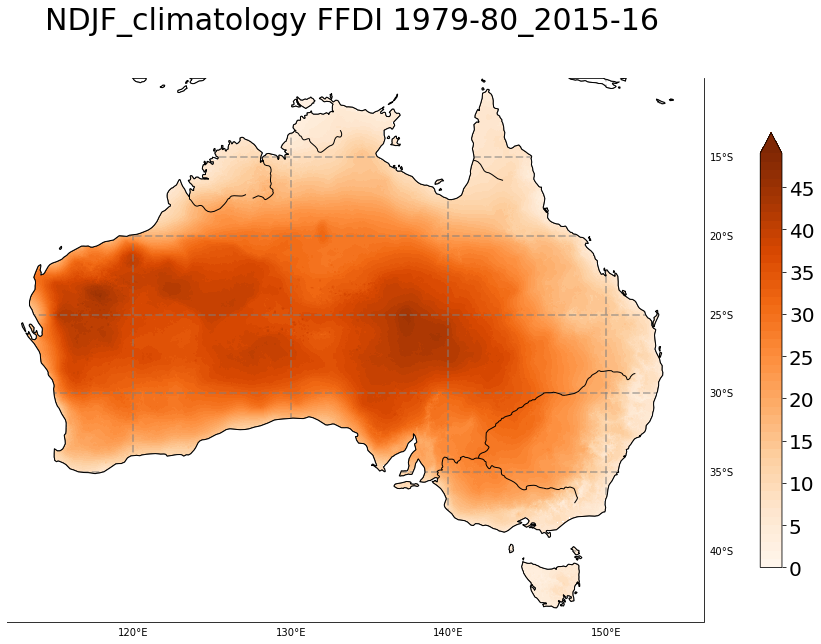

In [37]:
#Climatology plot
arr = FFDI_clim
SOM = 'NDJF_climatology'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(0,50,1)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'max',
                        cmap = 'Oranges',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

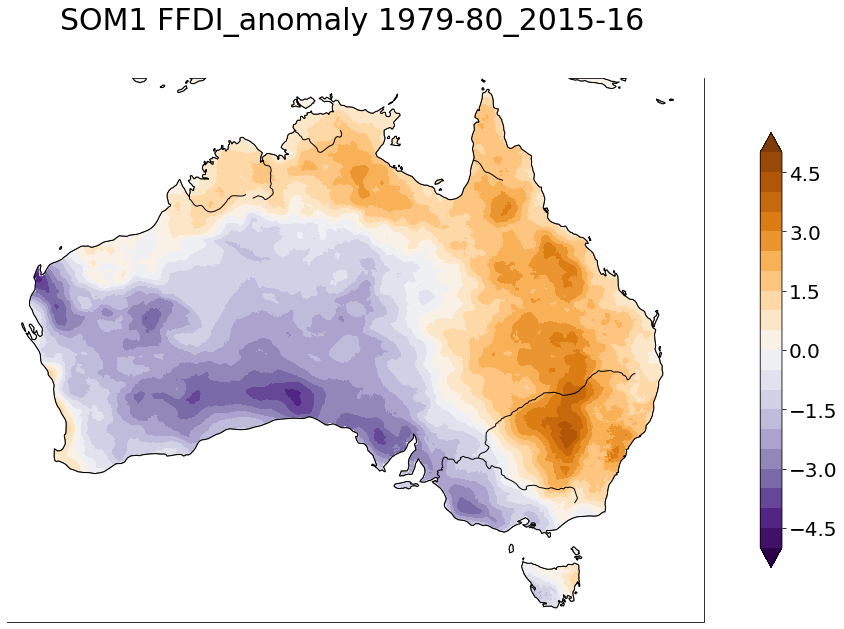

In [47]:
arr = aSOM1
SOM = 'SOM1'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

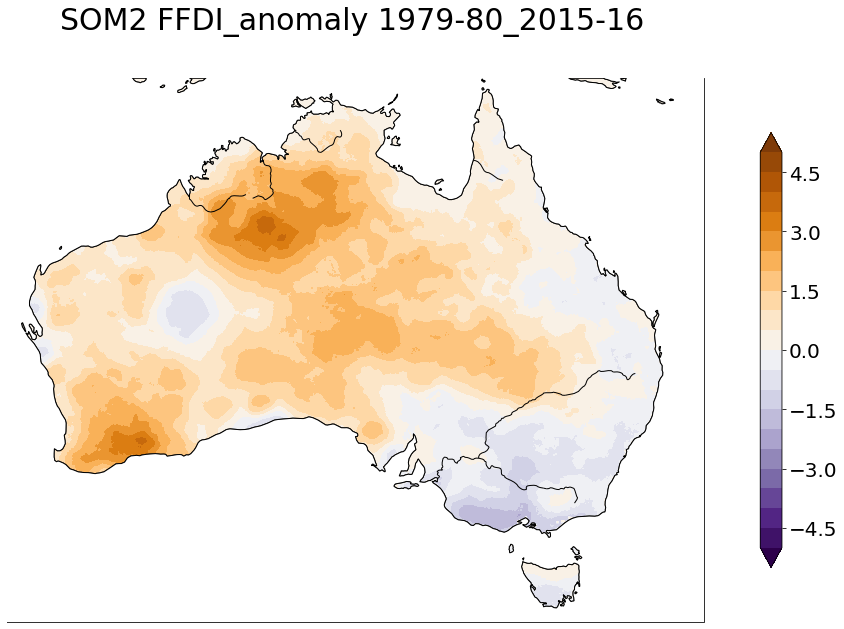

In [48]:
arr = aSOM2
SOM = 'SOM2'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

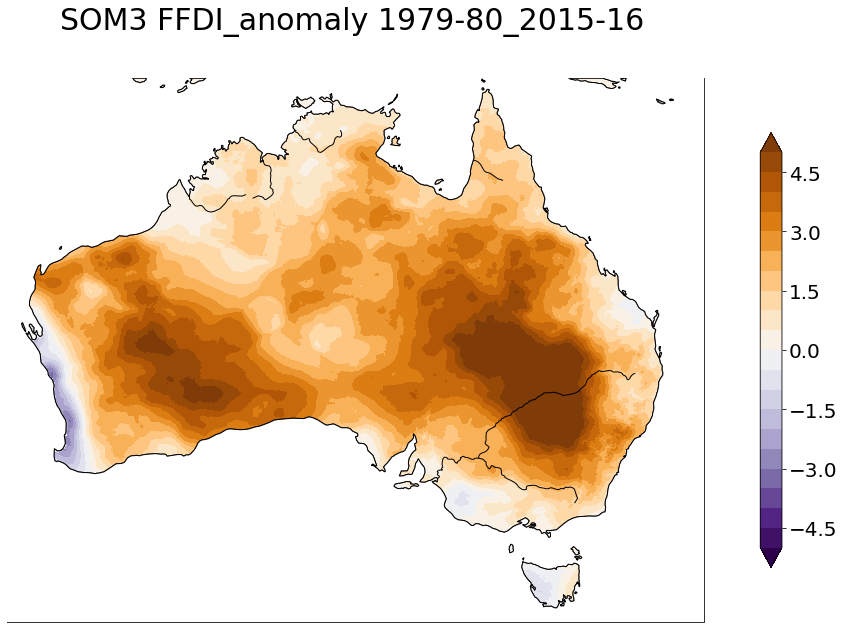

In [49]:
arr = aSOM3
SOM = 'SOM3'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

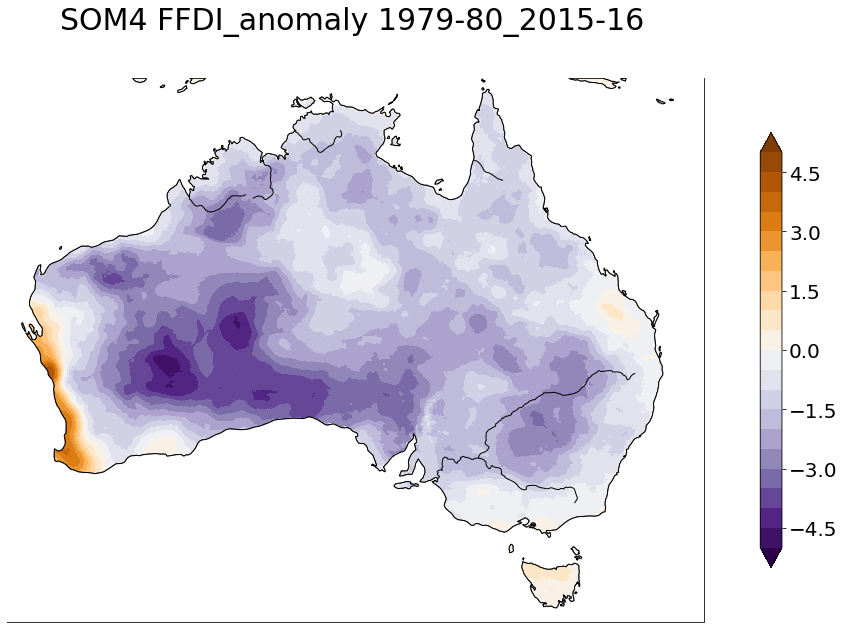

In [50]:
arr = aSOM4
SOM = 'SOM4'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

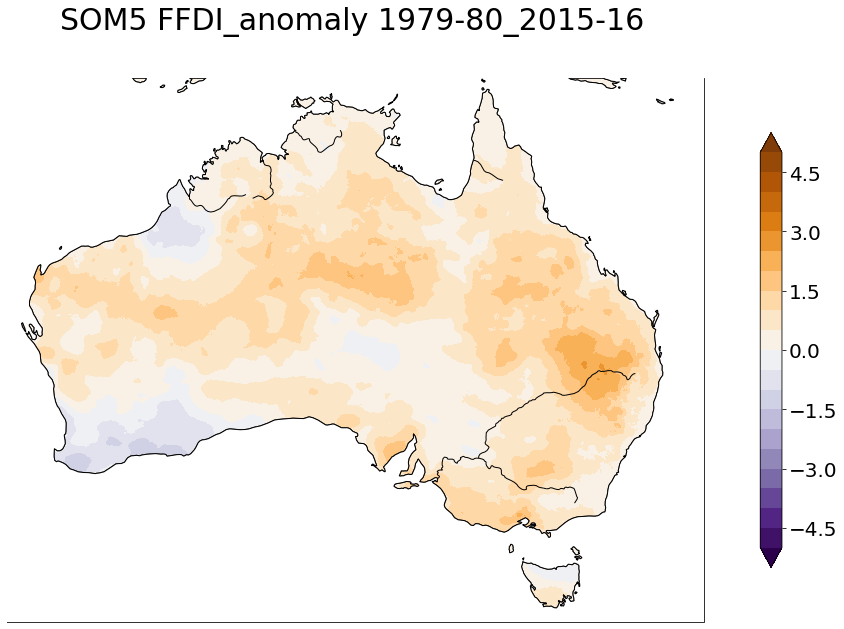

In [51]:
arr = aSOM5
SOM = 'SOM5'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

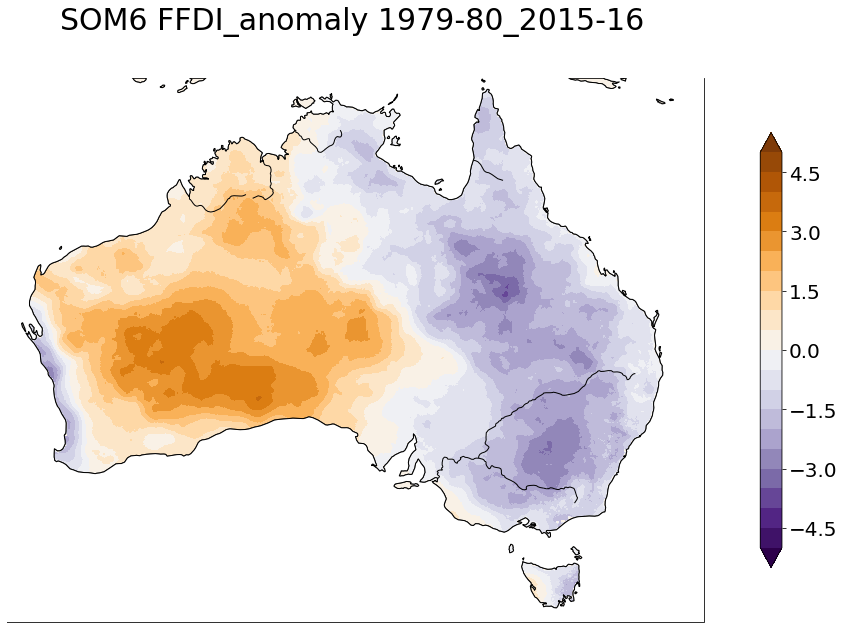

In [52]:
arr = aSOM6
SOM = 'SOM6'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

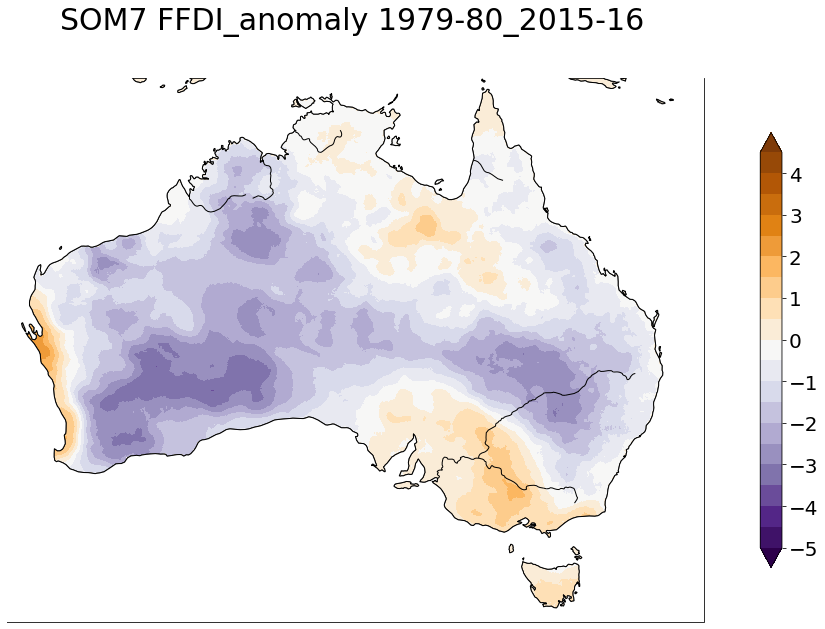

In [53]:
arr = aSOM7
SOM = 'SOM7'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

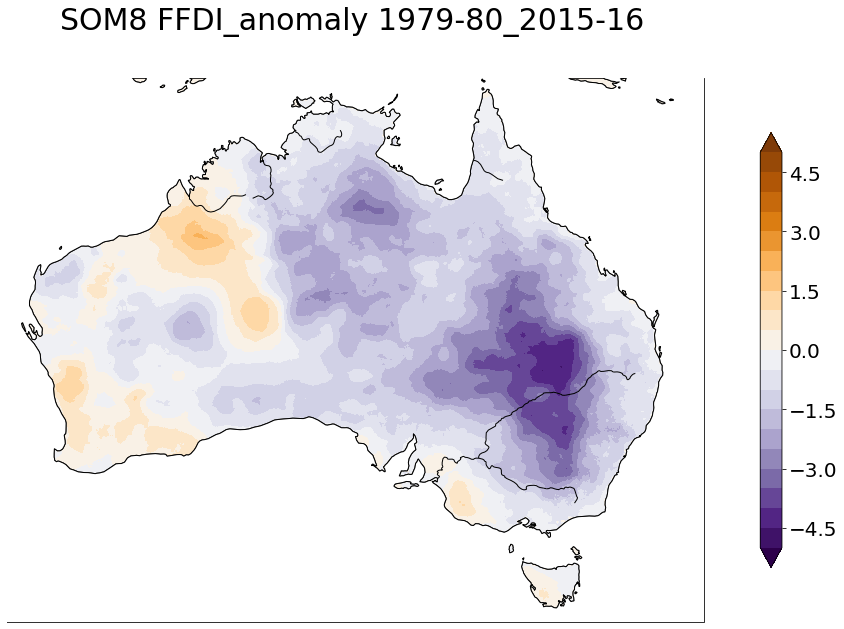

In [54]:
arr = aSOM8
SOM = 'SOM8'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')

    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')

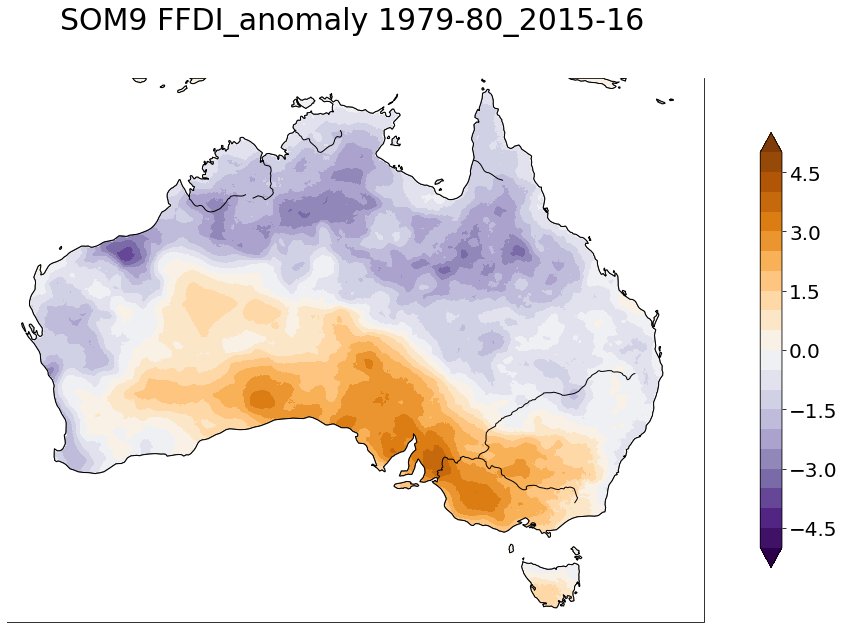

In [17]:
arr = aSOM9
SOM = 'SOM9'

output = '/g/data/v45/du2523/SOM_fire_weather_composites/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(-5,5.5,0.5)
#ID = 'LDsss_FFDI_corr_sig'
var = SOM
period = '1979-80_2015-16'
ID = 'FFDI_anomaly'
region = 'Aus'

#either corr or dcorr

cp = arr.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'PuOr_r',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False)

cb = fig.colorbar(cp, ax = ax, shrink = 0.8)
for t in cb.ax.get_yticklabels():
    t.set_fontsize(20)
    
ax.coastlines()
ax.add_feature(cart.feature.OCEAN,zorder=100, edgecolor='k', facecolor = 'w')
ax.add_feature(cart.feature.RIVERS,zorder=100,edgecolor='k')
    
fig.suptitle(var + ' ' + ID + ' ' + period ,fontsize = 30)
 
#save figure
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID +'_'+ period + '_' + region  +'.pdf')